## Repertoires analysis

In [1]:
import sys
import os 
sys.path.append(os.path.dirname(sys.path[0]) + '/src')
from ast import literal_eval
import pandas as pd

train_df = pd.read_csv('../data/processed/sentipolc/subj_rep_train.csv', converters={'rep': literal_eval})
test_df = pd.read_csv('../data/processed/sentipolc/subj_rep_test.csv', converters={'rep': literal_eval})

In [2]:
from datasets import hyperion_dataset

iro_df = train_df.loc[train_df['iro'] == 1]
iro_reps = iro_df.apply(lambda x: x['rep'], axis=1)
iro_reps =iro_reps.apply(pd.Series).stack().reset_index(drop=True)
iro_count = iro_reps.value_counts()
iro_size = iro_count.sum()
iro_dict = {} 
for l in hyperion_dataset.LABELS:
    try:
        iro_dict[l] = iro_count[l]
    except KeyError:
        iro_dict[l] = 0
iro_size

1124

In [3]:
from datasets import hyperion_dataset

no_iro_df = train_df.loc[train_df['iro'] == 0]
no_iro_reps = no_iro_df.apply(lambda x: x['rep'], axis=1)
no_iro_reps = no_iro_reps.apply(pd.Series).stack().reset_index(drop=True)
no_iro_count = no_iro_reps.value_counts()
no_iro_size = no_iro_count.sum()
no_iro_dict = {} 
for l in hyperion_dataset.LABELS:
    try:
        no_iro_dict[l] = no_iro_count[l]
    except KeyError:
        no_iro_dict[l] = 0
no_iro_size

8132

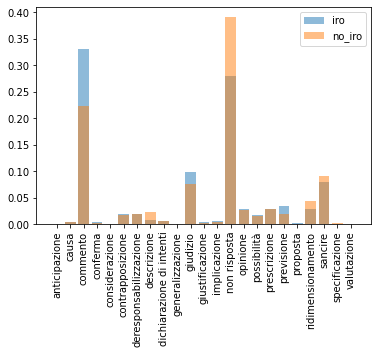

In [4]:
from matplotlib import pyplot  as plt

plt.bar(iro_dict.keys(),[e/iro_size for e in iro_dict.values()] , alpha=0.5, label='iro', align='center')
plt.bar(no_iro_dict.keys(),[e/no_iro_size for e in no_iro_dict.values()] , alpha=0.5, label='no_iro', align='center')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

## Classifier

In [9]:
n_iro = train_df['iro'].loc[train_df['iro'] == 1].count()
print(n_iro)

n_no_iro = train_df['iro'].loc[train_df['iro'] == 0].count()
print(n_no_iro)

868
6542


In [6]:
from datasets.hyperion_dataset import encode_str_label, LABELS
import numpy as np

def frequency_vec(reps:list) -> list:
    freq = np.zeros(len(LABELS))
    for r in reps:
        freq[encode_str_label(r)] += 1
    return freq

def weigths_vec(reps:list) -> list:
    freq = np.zeros(len(LABELS))
    for r in reps:
        freq[encode_str_label(r)] += 1
        
    return np.divide(freq, len(reps))

In [7]:
X_train = [frequency_vec(reps) for reps in train_df['rep']]
y_train = train_df['iro'].to_list()

X_test = [frequency_vec(reps) for reps in test_df['rep']]
y_test = test_df['iro'].to_list()

Precision iro: 0.243
Precision no iro: 0.908
Recall iro: 0.353
Recall no_iro: 0.854
F1 iro: 0.288
F1 no_iro: 0.880
F1 mean: 0.584
Accuracy: 0.795


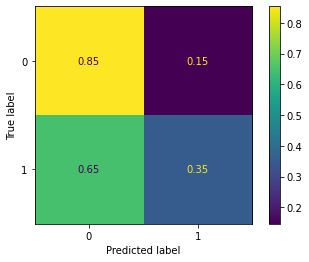

In [8]:
from sklearn import svm


clf = svm.SVC(kernel='poly' ,C = 0.009, class_weight='balanced')
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

pr_iro = precision_score(y_test, y_pred, pos_label=1)
pr_no_iro = precision_score(y_test, y_pred, pos_label=0)

rec_iro = recall_score(y_test, y_pred, pos_label=1)
rec_no_iro = recall_score(y_test, y_pred, pos_label=0)

f1_iro = f1_score(y_test, y_pred, pos_label=1)
f1_no_iro = f1_score(y_test, y_pred, pos_label=0)

acc = accuracy_score(y_test, y_pred,)

print('Precision iro: {0:.3f}'.format(pr_iro))
print('Precision no iro: {0:.3f}'.format(pr_no_iro))
print('Recall iro: {0:.3f}'.format(rec_iro))
print('Recall no_iro: {0:.3f}'.format(rec_no_iro))
print('F1 iro: {0:.3f}'.format(f1_iro))
print('F1 no_iro: {0:.3f}'.format(f1_no_iro))
print('F1 mean: {0:.3f}'.format((f1_iro+f1_no_iro)/2))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
disp.plot()
plt.show()

Precision iro: 0.180
Precision no iro: 0.911
Recall iro: 0.477
Recall no_iro: 0.712
F1 iro: 0.262
F1 no_iro: 0.799
F1 mean: 0.530
Accuracy: 0.684


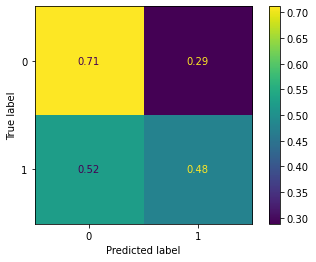

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

clf = DecisionTreeClassifier(criterion='gini', class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)




pr_iro = precision_score(y_test, y_pred, pos_label=1)
pr_no_iro = precision_score(y_test, y_pred, pos_label=0)

rec_iro = recall_score(y_test, y_pred, pos_label=1)
rec_no_iro = recall_score(y_test, y_pred, pos_label=0)

f1_iro = f1_score(y_test, y_pred, pos_label=1)
f1_no_iro = f1_score(y_test, y_pred, pos_label=0)

acc = accuracy_score(y_test, y_pred,)

print('Precision iro: {0:.3f}'.format(pr_iro))
print('Precision no iro: {0:.3f}'.format(pr_no_iro))
print('Recall iro: {0:.3f}'.format(rec_iro))
print('Recall no_iro: {0:.3f}'.format(rec_no_iro))
print('F1 iro: {0:.3f}'.format(f1_iro))
print('F1 no_iro: {0:.3f}'.format(f1_no_iro))
print('F1 mean: {0:.3f}'.format((f1_iro+f1_no_iro)/2))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
disp.plot()
plt.show()

Precision iro: 0.190
Precision no iro: 0.910
Recall iro: 0.447
Recall no_iro: 0.746
F1 iro: 0.266
F1 no_iro: 0.820
F1 mean: 0.543
Accuracy: 0.711


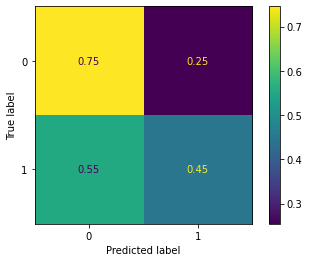

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

clf = RandomForestClassifier(criterion='gini', class_weight='balanced', n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

pr_iro = precision_score(y_test, y_pred, pos_label=1)
pr_no_iro = precision_score(y_test, y_pred, pos_label=0)

rec_iro = recall_score(y_test, y_pred, pos_label=1)
rec_no_iro = recall_score(y_test, y_pred, pos_label=0)

f1_iro = f1_score(y_test, y_pred, pos_label=1)
f1_no_iro = f1_score(y_test, y_pred, pos_label=0)

acc = accuracy_score(y_test, y_pred,)

print('Precision iro: {0:.3f}'.format(pr_iro))
print('Precision no iro: {0:.3f}'.format(pr_no_iro))
print('Recall iro: {0:.3f}'.format(rec_iro))
print('Recall no_iro: {0:.3f}'.format(rec_no_iro))
print('F1 iro: {0:.3f}'.format(f1_iro))
print('F1 no_iro: {0:.3f}'.format(f1_no_iro))
print('F1 mean: {0:.3f}'.format((f1_iro+f1_no_iro)/2))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
disp.plot()
plt.show()